# Agregación de datos por categoría

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female']

In [5]:
income_data[1:10]

['Rich',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Poor',
 'Poor',
 'Poor',
 'Middle Class',
 'Poor']

In [6]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [7]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,121.766838,74.573424,26.013871,18338.751701
1,Female,Rich,164.732898,88.167398,18.406061,20786.292414
2,Female,Middle Class,161.280257,35.289343,41.525844,18715.823559
3,Female,Middle Class,220.040470,65.635604,33.119602,18723.736702
4,Female,Poor,141.226845,49.584227,36.223443,19082.118854


## Agrupación de datos

In [9]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': Int64Index([  1,   2,   3,   4,   6,   8,   9,  11,  14,  15,
             ...
             482, 483, 484, 487, 490, 491, 492, 493, 495, 496],
            dtype='int64', length=264),
 'Male': Int64Index([  0,   5,   7,  10,  12,  13,  22,  23,  24,  25,
             ...
             479, 481, 485, 486, 488, 489, 494, 497, 498, 499],
            dtype='int64', length=236)}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
1    Female            Rich  164.732898  88.167398  18.406061  20786.292414
2    Female    Middle Class  161.280257  35.289343  41.525844  18715.823559
3    Female    Middle Class  220.040470  65.635604  33.119602  18723.736702
4    Female            Poor  141.226845  49.584227  36.223443  19082.118854
6    Female            Poor  126.798769  10.123532  45.674613  20447.332039
..      ...             ...         ...        ...        ...           ...
491  Female            Rich  121.155185  47.417021  28.484502  20281.757100
492  Female    Middle Class  192.890649  57.288193  27.407749  20710.520958
493  Female            Rich  204.319481  75.307282  30.997253  20113.578054
495  Female            Poor  117.442242  60.301231  16.415468  20224.175730
496  Female            Rich  181.394210  55.337865  26.207658  18294.416255

[264 rows x 6 columns]
Male
    Gender Economic Status      Height     Weight   

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Rich,164.732898,88.167398,18.406061,20786.292414
2,Female,Middle Class,161.280257,35.289343,41.525844,18715.823559
3,Female,Middle Class,220.040470,65.635604,33.119602,18723.736702
4,Female,Poor,141.226845,49.584227,36.223443,19082.118854
6,Female,Poor,126.798769,10.123532,45.674613,20447.332039
8,Female,Middle Class,162.690503,47.281674,23.497014,20473.024132
9,Female,Poor,149.025935,59.854050,26.768906,20331.990196
11,Female,Rich,153.529459,56.189201,35.509118,19065.767330
14,Female,Middle Class,177.984715,1.737862,13.009163,19512.324450
15,Female,Middle Class,178.563765,47.044048,15.602048,21445.776140


In [13]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
2    Female    Middle Class  161.280257  35.289343  41.525844  18715.823559
3    Female    Middle Class  220.040470  65.635604  33.119602  18723.736702
8    Female    Middle Class  162.690503  47.281674  23.497014  20473.024132
14   Female    Middle Class  177.984715   1.737862  13.009163  19512.324450
15   Female    Middle Class  178.563765  47.044048  15.602048  21445.776140
..      ...             ...         ...        ...        ...           ...
480  Female    Middle Class  193.588240 -23.508006  23.129804  18201.377655
482  Female    Middle Class  188.950940  76.324954  20.542802  21414.314271
484  Female    Middle Class  139.059458  57.501803  52.469212  18261.224269
487  Female    Middle Class  134.496177  72.417358   4.129833  18945.061850
492  Female    Middle Class  192.890649  57.288193  27.407749  20710.520958

[91 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     15065.324597  5651.233345  2727.225747  1.795154e+06
       Poor             12905.844420  4921.118494  2389.141401  1.558209e+06
       Rich             14831.229467  6007.834740  2725.790144  1.851477e+06
Male   Middle Class     13629.124894  5661.075591  2475.755196  1.699704e+06
       Poor             10710.493601  4567.568794  2078.161534  1.367774e+06
       Rich             12699.731646  5414.655189  2392.550682  1.607733e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     165.553018  62.101465  29.969514  19726.971670
       Poor             163.365119  62.292639  30.242296  19724.167803
       Rich             157.779037  63.913136  28.997767  19696.565272
Male   Middle Class     158.478196  65.826460  28.787851  19763.996697
       Poor             155.224545  66.196649  30.118283  19822.818228
       Rich             156.786810  66.847595  29.537663  19848.556476

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       91
        Poor               79
        Rich               94
Male    Middle Class       86
        Poor               69
        Rich               81
dtype: int64

In [19]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      91.0  165.553018  26.221359  105.645502  145.273572   
       Poor              79.0  163.365119  29.985548  106.982513  141.549119   
       Rich              94.0  157.779037  29.004748   95.354231  138.521001   
Male   Middle Class      86.0  158.478196  32.590062   58.994581  135.885334   
       Poor              69.0  155.224545  31.468835   76.915477  135.283300   
       Rich              81.0  156.786810  32.618191   75.269417  138.108285   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     169.530111  183.280636  220.040470   91.0  62.101465   
       Poor             157.551748  187.454475  227.151709   79.0  62.292639   
       Rich             158.800684  181.204656  209.603701   94.0  63.913136   
Male   Middle Class     160.226923  173.262762  248.343283   86.0  65.826460   
       Poor             155.645142  180.002976  243.083416   69.0  66.196649   
       Rich             156.070895  175.140720  249.765002   81.0  66.847595   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  41.061470  52.469212   91.0  19726.971670   
       Poor             ...  39.659078  55.523983   79.0  19724.167803   
       Rich             ...  36.283324  69.813340   94.0  19696.565272   
Male   Middle Class     ...  37.438114  50.696380   86.0  19763.996697   
       Poor             ...  38.296864  54.800939   69.0  19822.818228   
       Rich             ...  37.705170  67.453959   81.0  19848.556476   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1005.525575  18014.008189  18927.763008  19699.673445   
       Poor              961.175463  18000.457744  18840.842694  19774.814944   
       Rich             1011.987564  18028.068706  18885.646741  19703.071480   
Male   Middle Class     1030.354586  18091.926544  18941.885033  19630.340732   
       Poor              961.565651  18081.521640  19211.195533  19718.771063   
       Rich              959.619097  18003.398876  19183.400819  19853.376044   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20561.797610  21494.056813  
       Poor             20304.817862  21483.308351  
       Rich             20502.454748  21471.095884  
Male   Middle Class     20659.895372  21497.028146  
       Poor             20685.705385  21439.896226  
       Rich             20630.183466  21444.274372  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group["Income"]

In [21]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      91.0  19726.971670  1005.525575  18014.008189   
       Poor              79.0  19724.167803   961.175463  18000.457744   
       Rich              94.0  19696.565272  1011.987564  18028.068706   
Male   Middle Class      86.0  19763.996697  1030.354586  18091.926544   
       Poor              69.0  19822.818228   961.565651  18081.521640   
       Rich              81.0  19848.556476   959.619097  18003.398876   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18927.763008  19699.673445  20561.797610  21494.056813  
       Poor             18840.842694  19774.814944  20304.817862  21483.308351  
       Rich             18885.646741  19703.071480  20502.454748  21471.095884  
Male   Middle Class     18941.885033  19630.340732  20659.895372  21497.028146  
       Poor             19211.195533  19718.771063  20685.705385  21439.896226  
       Rich             19183.400819  19853.376044  20630.183466  21444.274372

In [22]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.795154e+06  29.969514  26.221359
       Poor             1.558209e+06  30.242296  29.985548
       Rich             1.851477e+06  28.997767  29.004748
Male   Middle Class     1.699704e+06  28.787851  32.590062
       Poor             1.367774e+06  30.118283  31.468835
       Rich             1.607733e+06  29.537663  32.618191

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.969514  6.348649
       Poor             30.242296  5.482941
       Rich             28.997767  5.468934
Male   Middle Class     28.787851  4.891298
       Poor             30.118283  4.968781
       Rich             29.537663  4.836678

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     15065.324597  165.553018  26.221359  5651.233345   
       Poor             12905.844420  163.365119  29.985548  4921.118494   
       Rich             14831.229467  157.779037  29.004748  6007.834740   
Male   Middle Class     13629.124894  158.478196  32.590062  5661.075591   
       Poor             10710.493601  155.224545  31.468835  4567.568794   
       Rich             12699.731646  156.786810  32.618191  5414.655189   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     62.101465  27.315232  2727.225747  29.969514   
       Poor             62.292639  28.795332  2389.141401  30.242296   
       Rich             63.913136  24.959953  2725.790144  28.997767   
Male   Middle Class     65.826460  23.672051  2475.755196  28.787851   
       Poor             66.196649  26.701689  2078.161534  30.118283   
       Rich             66.847595  24.652531  2392.550682  29.537663   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     13.447824  1.795154e+06  19726.971670  1005.525575  
       Poor             12.712888  1.558209e+06  19724.167803   961.175463  
       Rich             11.898138  1.851477e+06  19696.565272  1011.987564  
Male   Middle Class     11.631256  1.699704e+06  19763.996697  1030.354586  
       Poor             13.794966  1.367774e+06  19822.818228   961.565651  
       Rich             13.384181  1.607733e+06  19848.556476   959.619097

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     6.348649  2.286106  2.240924  19.727259
       Poor             5.482941  2.177113  2.394070  20.652007
       Rich             5.468934  2.574357  2.450237  19.567610
Male   Middle Class     4.891298  2.797077  2.489559  19.294247
       Poor             4.968781  2.497281  2.199276  20.766177
       Rich             4.836678  2.728486  2.220659  20.812659

## Filtrado de datos

In [26]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      26.013871
1      18.406061
2      41.525844
3      33.119602
8      23.497014
         ...    
492    27.407749
493    30.997253
496    26.207658
497    21.468789
498    15.241500
Name: Age, Length: 271, dtype: float64

## Transformación de variables

In [27]:
zscore = lambda x : (x - x.mean())/x.std()

In [28]:
z_group = double_group.transform(zscore)

In [29]:
import matplotlib.pyplot as plt

(array([  4.,  13.,  39.,  88., 115., 129.,  78.,  31.,   1.,   2.]),
 array([-3.22055841, -2.5554609 , -1.89036338, -1.22526587, -0.56016835,
         0.10492916,  0.77002668,  1.43512419,  2.10022171,  2.76531922,
         3.43041674]),
 <a list of 10 Patch objects>)

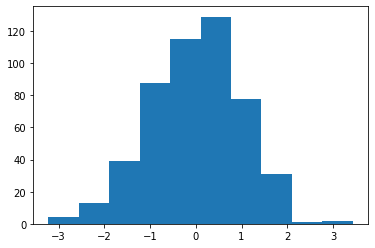

In [30]:
plt.hist(z_group["Age"])

In [31]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,121.766838,74.573424,26.013871,18338.751701
1,164.732898,88.167398,18.406061,20786.292414
2,161.280257,35.289343,41.525844,18715.823559
3,220.040470,65.635604,33.119602,18723.736702
4,141.226845,49.584227,36.223443,19082.118854
5,153.821139,16.140493,32.447456,20333.721951
6,126.798769,10.123532,45.674613,20447.332039
7,199.199297,56.813299,54.800939,21316.421578
8,162.690503,47.281674,23.497014,20473.024132
9,149.025935,59.854050,26.768906,20331.990196


## Operaciones diversas muy útiles

In [33]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,121.766838,74.573424,26.013871,18338.751701
1,Female,Rich,164.732898,88.167398,18.406061,20786.292414
2,Female,Middle Class,161.280257,35.289343,41.525844,18715.823559
4,Female,Poor,141.226845,49.584227,36.223443,19082.118854
5,Male,Poor,153.821139,16.140493,32.447456,20333.721951
12,Male,Rich,163.527407,69.097184,26.752719,20313.727892


In [34]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
441,Male,Rich,104.446241,62.118163,48.212254,19622.175329
492,Female,Middle Class,192.890649,57.288193,27.407749,20710.520958
495,Female,Poor,117.442242,60.301231,16.415468,20224.175730
496,Female,Rich,181.394210,55.337865,26.207658,18294.416255
498,Male,Middle Class,80.921743,77.058800,15.241500,19555.492310
499,Male,Poor,158.398692,67.743887,25.816028,20881.441830


In [35]:
double_group.nth(32)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     127.226440   74.675987  18.362384  20445.441179
       Poor             180.373672   70.383255  27.098049  20277.645527
       Rich             165.009126   65.279462  24.138711  21362.447769
Male   Middle Class     169.761950   72.731031  29.602446  20144.564315
       Poor             152.822531  123.415069  16.701411  19102.310504
       Rich             122.367094   73.633487  40.605095  19835.057481

In [36]:
double_group.nth(82)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     139.832582  61.215785  17.554024  18278.058580
       Rich             196.412873  62.059308  22.084034  19564.723429
Male   Middle Class     139.696644  65.861735  30.060301  19116.185666

In [37]:
data_sorted = data.sort_values(["Age", "Income"])

In [38]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
297,Male,Poor,180.002976,78.407800,-14.309210,18147.163556
172,Female,Middle Class,123.643957,56.331026,-7.090776,18809.629195
236,Male,Rich,173.461779,46.792547,-5.556425,18071.295525
73,Male,Rich,205.387486,75.780462,-5.556067,21141.594265
455,Male,Poor,179.140158,72.504980,-2.910796,18081.521640
248,Male,Rich,206.559818,51.512279,-1.847212,19994.672899
218,Female,Rich,189.040939,73.340280,-0.406825,20274.463045
281,Female,Poor,149.769535,92.360540,0.576953,18737.434706
389,Female,Poor,212.612187,63.044590,0.667078,18592.083930
81,Male,Poor,170.022945,49.890352,3.652634,20330.178173


In [39]:
age_grouped = data_sorted.groupby("Gender")

In [40]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
297,Male,Poor,180.002976,78.407800,-14.309210,18147.163556
172,Female,Middle Class,123.643957,56.331026,-7.090776,18809.629195


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
352,Male,Rich,153.235125,81.350246,67.453959,19612.903341
405,Female,Rich,160.426819,56.028011,69.813340,18414.516083


# Conjunto de entrenamiento y conjunto de testing

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [44]:
len(data)

3333

## Dividir utilizando la distribución normal

In [88]:
a = np.random.randn(len(data))

(array([  2.,  26., 128., 423., 833., 968., 639., 234.,  62.,  18.]),
 array([-3.96656255, -3.21443764, -2.46231273, -1.71018783, -0.95806292,
        -0.20593801,  0.54618689,  1.2983118 ,  2.05043671,  2.80256161,
         3.55468652]),
 <a list of 10 Patch objects>)

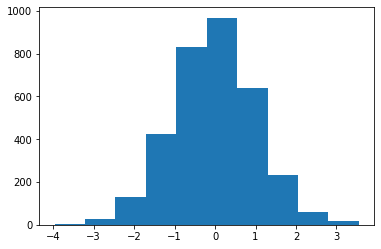

In [89]:
plt.hist(a)

In [90]:
check = (a<0.80)

In [91]:
check

array([ True,  True,  True, ...,  True,  True, False])

## CORREGIDO

(array([ 715.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2618.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

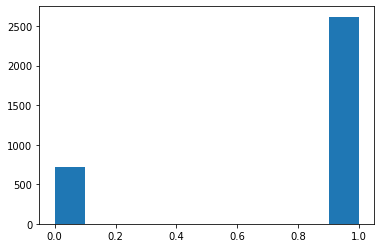

In [92]:
plt.hist(check*1)

In [93]:
training = data[check]
testing = data[~check]

In [94]:
len(training)

2618

In [95]:
len(testing)

715

## Con la libreria sklearn  - corregido

In [96]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [97]:
train, test = train_test_split(data, test_size = 0.2)

In [98]:
len(train)

2666

In [99]:
len(test)

667

## Usando una función de shuffle

In [100]:
import numpy as np

In [112]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
180,WV,94,510,355-5009,yes,yes,23,197.1,125,33.51,...,136,18.23,282.2,103,12.70,9.5,5,2.57,4,False.
130,NE,90,415,353-6870,no,no,0,145.5,92,24.74,...,114,18.50,146.9,123,6.61,10.9,2,2.94,3,False.
1509,MN,142,510,355-7895,no,yes,40,237.4,105,40.36,...,93,14.95,210.3,110,9.46,9.2,3,2.48,3,False.
2457,MD,130,415,364-9567,no,yes,45,174.5,120,29.67,...,95,18.49,220.3,67,9.91,12.2,2,3.29,1,False.
896,VT,125,415,372-4722,no,no,0,126.7,113,21.54,...,131,13.22,206.2,112,9.28,14.4,7,3.89,2,False.


In [113]:
import sklearn

In [114]:
data = sklearn.utils.shuffle(data)

In [115]:
cut_id = int(0.8*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [116]:
len(train_data)

2666

In [117]:
len(test_data)

666